# Preparation

In [1]:
#!pip install --upgrade mplfinance
#!pip install --upgrade openpyxl
#!pip install tabulate

In [2]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import os
import pandas as pd
import matplotlib as mpl
import mplfinance as mpf
import openpyxl
import tabulate
from pathlib import Path
import numpy as np
from datetime import date, datetime

# Data Import

In [4]:
# Paths to files
all_coins_path = '../coin-prices/'
btc_path = '../coin-prices/btc/'
doge_path = '../coin-prices/doge/'
eth_path = '../coin-prices/eth/'

In [5]:
# File Names
all_coins_daily_2y_file = 'all_coins_daily_2y_2021-07-04.csv'
all_coins_daily_ytd_file = 'all_coins_daily_ytd_2021-07-04.csv'
all_coins_weekly_2y_file = 'all_coins_weekly_2y_2021-07-04.csv'
btc_daily_2y_file = 'btc_daily_2y_2021-07-04.csv'
btc_daily_ytd_file = 'btc_daily_ytd_2021-07-04.csv'
btc_weekly_2y_file = 'btc_weekly_2y_2021-07-04.csv'
btc_weekly_ytd_file = 'btc_weekly_ytd_2021-07-04.csv'
doge_daily_2y_file = 'doge_daily_2y_2021-07-04.csv'
doge_daily_ytd_file = 'doge_daily_ytd_2021-07-04.csv'
doge_weekly_2y_file = 'doge_weekly_2y_2021-07-04.csv'
doge_weekly_ytd_file = 'doge_weekly_ytd_2021-07-04.csv'
eth_daily_2y_file = 'eth_daily_2y_2021-07-04.csv'
eth_daily_ytd_file = 'eth_daily_ytd_2021-07-04.csv'
eth_weekly_2y_file = 'eth_weekly_2y_2021-07-04.csv'
eth_weekly_ytd_file = 'eth_weekly_ytd_2021-07-04.csv'

In [6]:
# Import Data as Prepared beforehand
## Daily
btc_data = pd.read_csv(btc_path + btc_daily_2y_file, parse_dates = True, index_col = 0)
btc_data.index.name = 'Date'
display(btc_data)
doge_data = pd.read_csv(doge_path + doge_daily_2y_file, parse_dates = True, index_col = 0)
doge_data.index.name = 'Date'
eth_data = pd.read_csv(eth_path + eth_daily_2y_file, parse_dates = True, index_col = 0)
eth_data.index.name = 'Date'
## Weekly
btc_data_weekly = pd.read_csv(btc_path + btc_weekly_ytd_file, parse_dates = True, index_col = 0)
btc_data_weekly['WeekNumber'] = pd.DatetimeIndex(btc_data_weekly.index).isocalendar().week
btc_data_weekly['Date'] = btc_data_weekly.index
btc_data_weekly.set_index('WeekNumber', inplace = True)
#display(btc_data_weekly)
doge_data_weekly = pd.read_csv(doge_path + doge_weekly_ytd_file, parse_dates = True, index_col = 0)
doge_data_weekly['WeekNumber'] = pd.DatetimeIndex(doge_data_weekly.index).isocalendar().week
doge_data_weekly['Date'] = doge_data_weekly.index
doge_data_weekly.set_index('WeekNumber', inplace = True)
eth_data_weekly = pd.read_csv(eth_path + eth_weekly_ytd_file, parse_dates = True, index_col = 0)
eth_data_weekly['WeekNumber'] = pd.DatetimeIndex(eth_data_weekly.index).isocalendar().week
eth_data_weekly['Date'] = eth_data_weekly.index
eth_data_weekly.set_index('WeekNumber', inplace = True)

,Open,High,Low,Close,Volume
Date,,,,,
2019-07-04,11972.718750,12006.075195,11166.569336,11215.437500,25920294033
2019-07-05,11203.102539,11395.661133,10874.964844,10978.459961,23838480210
2019-07-06,10982.543945,11620.964844,10982.543945,11208.550781,21092024306
2019-07-07,11217.616211,11541.620117,11148.804688,11450.846680,19369044277
2019-07-08,11446.596680,12345.833008,11393.374023,12285.958008,23482551458
...,...,...,...,...,...
2021-06-30,35908.386719,36074.757812,34086.152344,35040.835938,34059036099
2021-07-01,35035.984375,35035.984375,32883.781250,33572.117188,37838957079
2021-07-02,33549.601562,33939.589844,32770.679688,33897.046875,38728974942


In [7]:
SA_results_path = '../results/'
results_file_name = 'final3_sentiments.csv'
#results = openpyxl.load_workbook(SA_results_path + results_file_name) 
#sheet = results.active
#print(sheet.max_row, sheet.max_column)

results = pd.read_csv(SA_results_path + results_file_name, header = 0, parse_dates=["Date"], index_col = False, keep_default_na = True)
results.rename(columns = {'Author':'Podcast'}, inplace = True)
#results['Date'] = pd.to_datetime(results['Date'])
#results.Date.dt.strftime('%Y-%m-%d').astype(int)
results.sort_values(by = "Date")
display(results)

,Date,Podcast,Title,Clip_Id,File_Name,Text,Coin,Pitch_Min,Pitch_Max,Pitch_05_Quantile,Pitch_95_Quantile,Pitch_Range,pitch stdev,Pitch_Mean,Pitch_Median,Jitter,Shimmer,Hammarberg_Index,Sentiment
0,2021-01-01,Altcoin_Daily,My 2021 Bitcoin Price Prediction! I’m HIGHLY C...,6,Altcoin Daily<sep>20210101<sep>My 2021 Bitcoin...,to my price prediction before i share with you...,BTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bullish
8703,2021-01-01,EllioTrades_Crypto,BITCOIN SUPPLY CRISIS! $1M BTC Coming,0,EllioTrades Crypto<sep>20210101<sep>BITCOIN SU...,bitcoin is experiencing a full blown supplied ...,BTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral
8704,2021-01-01,EllioTrades_Crypto,BITCOIN SUPPLY CRISIS! $1M BTC Coming,1,EllioTrades Crypto<sep>20210101<sep>BITCOIN SU...,nd what we're going to show you today are the ...,BTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bullish
8705,2021-01-01,EllioTrades_Crypto,BITCOIN SUPPLY CRISIS! $1M BTC Coming,5,EllioTrades Crypto<sep>20210101<sep>BITCOIN SU...,than you got to make sure you've set that bell...,BTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bullish
8706,2021-01-01,EllioTrades_Crypto,BITCOIN SUPPLY CRISIS! $1M BTC Coming,6,EllioTrades Crypto<sep>20210101<sep>BITCOIN SU...,price allbeit indirectly you're buying shares ...,BTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bearish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8225,2021-06-30,Crypto_Daily_Trade_Signals,DOGECOIN HOLDERS BE WARNED!!,21,Crypto Daily Trade Signals<sep>20210630<sep>DO...,minae three percent right now uh ethereum is a...,ETH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bullish
8220,2021-06-30,Crypto_Daily_Trade_Signals,DOGECOIN HOLDERS BE WARNED!!,10,Crypto Daily Trade Signals<sep>20210630<sep>DO...,that's down right now guys uh 'so hopefull you...,BTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bearish
8223,2021-06-30,Crypto_Daily_Trade_Signals,DOGECOIN HOLDERS BE WARNED!!,19,Crypto Daily Trade Signals<sep>20210630<sep>DO...,ut it came in and came out and get assigned do...,ETH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bearish
8221,2021-06-30,Crypto_Daily_Trade_Signals,DOGECOIN HOLDERS BE WARNED!!,11,Crypto Daily Trade Signals<sep>20210630<sep>DO...,number of losers right now is sixty four versu...,BTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bullish


,Date,Podcast,Title,Clip_Id,File_Name,Text,Coin,Pitch_Min,Pitch_Max,Pitch_05_Quantile,Pitch_95_Quantile,Pitch_Range,pitch stdev,Pitch_Mean,Pitch_Median,Jitter,Shimmer,Hammarberg_Index,Sentiment
0,2021-01-01,Altcoin_Daily,My 2021 Bitcoin Price Prediction! I’m HIGHLY C...,6,Altcoin Daily<sep>20210101<sep>My 2021 Bitcoin...,to my price prediction before i share with you...,BTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bullish
1,2021-01-01,Altcoin_Daily,My 2021 Bitcoin Price Prediction! I’m HIGHLY C...,8,Altcoin Daily<sep>20210101<sep>My 2021 Bitcoin...,the new class of buyer is causing bitcoin to g...,BTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bullish
2,2021-01-01,Altcoin_Daily,My 2021 Bitcoin Price Prediction! I’m HIGHLY C...,9,Altcoin Daily<sep>20210101<sep>My 2021 Bitcoin...,large investors continue to accumulate bitcoin...,BTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral
3,2021-01-01,Altcoin_Daily,My 2021 Bitcoin Price Prediction! I’m HIGHLY C...,10,Altcoin Daily<sep>20210101<sep>My 2021 Bitcoin...,allet address is held by a single network part...,BTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bullish
4,2021-01-01,Altcoin_Daily,My 2021 Bitcoin Price Prediction! I’m HIGHLY C...,11,Altcoin Daily<sep>20210101<sep>My 2021 Bitcoin...,of this it has literally never been more expen...,BTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bullish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16288,2021-06-24,Tone_Vays,Bitcoin 101 w_ Bitcoin Motorist & Surfer Jim f...,317,Tone Vays<sep>20210624<sep>Bitcoin 101 w_ Bitc...,withdowy both doesn't make it more resilient o...,ETH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bullish
16289,2021-06-24,Tone_Vays,Bitcoin 101 w_ Bitcoin Motorist & Surfer Jim f...,318,Tone Vays<sep>20210624<sep>Bitcoin 101 w_ Bitc...,ome screenshare i seye what yo know want is l ...,ETH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bearish
16290,2021-06-24,Tone_Vays,Bitcoin 101 w_ Bitcoin Motorist & Surfer Jim f...,325,Tone Vays<sep>20210624<sep>Bitcoin 101 w_ Bitc...,ice would come back down from current levels i...,BTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bearish
16291,2021-06-24,Tone_Vays,Bitcoin 101 w_ Bitcoin Motorist & Surfer Jim f...,343,Tone Vays<sep>20210624<sep>Bitcoin 101 w_ Bitc...,uhtraditional markets until we'e got uh this i...,BTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bullish


# Extracting Data

## by Coin

In [8]:
BTC_signals = results.query('Coin == "BTC"')
DOGE_signals = results.query('Coin == "DOGE"')
ETH_signals = results.query('Coin == "ETH"')
list_of_coins = ("BTC", "DOGE", "ETH")
# print(list_of_coins)
number_of_sentiments_per_coin = results.groupby('Coin').size()
#print(number_of_sentiments_per_coin)
### by Coin = BTC
btc_sentiments_total = BTC_signals['Sentiment'].value_counts(dropna=False)
#print(btc_sentiments_total)
### by Coin = DOGE
doge_sentiments_total = DOGE_signals['Sentiment'].value_counts(dropna=False)
#print(doge_sentiments_total)
### by Coin = ETH
eth_sentiments_total = ETH_signals['Sentiment'].value_counts(dropna=False)
#print(eth_sentiments_total)

## by Podcast

In [9]:
# get all unique Podcasts (Podcast Name not Podcast Title)
# make query subsets for each unique podcast
list_of_podcasts = results.Podcast.unique()
# print(list_of_podcasts)
grouped_by_podcasts = results.groupby('Podcast')
#grouped_by_podcasts.head()
number_of_sentiments_per_podcasts = results.groupby('Podcast').size()
#print(number_of_sentiments_per_podcasts)

## by Date

In [10]:
list_of_dates = results.Date.unique()
#print(list_of_dates)
grouped_by_date = results.groupby('Date')
#grouped_by_date.head()
number_of_sentiments_per_date = results.groupby('Date').size()
#print(number_of_date)
sentiments_per_date = grouped_by_date['Sentiment'].value_counts(dropna=False)
#print(sentiments_per_date)

## by Sentiment

In [11]:
list_of_sentiments = ("bullish", "neutral", "bearish")
# print(list_of_sentiments)
number_of_sentiments = results.groupby('Sentiment').size()
#print(number_of_sentiments)

## Combining Data Extracts: Coin per Date

In [12]:
btc_grouped_by_date = BTC_signals.groupby('Date')
#btc_grouped_by_date.head()

## Combining Data Extracts: Coin per Sentiment

In [13]:
### Sentiment == Bullish
btc_bullish = BTC_signals.query('Sentiment == "bullish"')
#print(btc_bullish)
doge_bullish = DOGE_signals.query('Sentiment == "bullish"')
#print(doge_bullish)
eth_bullish = ETH_signals.query('Sentiment == "bullish"')
#print(eth_bullish)

### Sentiment == Bearish
btc_bearish = BTC_signals.query('Sentiment == "bearish"')
#print(btc_bearish)
doge_bearish = DOGE_signals.query('Sentiment == "bearish"')
#print(doge_bearish)
eth_bearish = ETH_signals.query('Sentiment == "bearish"')
#print(eth_bearish)

### Sentiment == Neutral
btc_neutral = BTC_signals.query('Sentiment == "neutral"')
#print(btc_neutral)
doge_neutral = DOGE_signals.query('Sentiment == "neutral"')
#print(doge_neutral)
eth_neutral = ETH_signals.query('Sentiment == "neutral"')
#print(eth_neutral)

### Special Case: Sentiment == bearish && Sentiment == neutral
btc_bearishn = BTC_signals.query('Sentiment != "bullish"')
#print(btc_bearishn)
doge_bearishn = DOGE_signals.query('Sentiment != "bullish"')
#print(doge_bearishn)
eth_bearishn = ETH_signals.query('Sentiment != "bullish"')
#print(eth_bearishn)

## Combining Data Extracts: Coin per Sentiment per Date

In [14]:
### Sentiment == bullish
btc_bullish_by_date = btc_bullish.groupby('Date').size()
btc_bullish_by_date.name = "BTC_bull_freq"
#btc_bullish_by_date.head()
doge_bullish_by_date = doge_bullish.groupby('Date').size()
doge_bullish_by_date.name = "DOGE_bull_freq"
#doge_bullish_by_date.head()
eth_bullish_by_date = eth_bullish.groupby('Date').size()
eth_bullish_by_date.name = "ETH_bull_freq"
#eth_bullish_by_date.head()

### Sentiment == bearish
btc_bearish_by_date = btc_bearish.groupby('Date').size()
btc_bearish_by_date.name = "BTC_bear_freq"
#btc_bearish_by_date.head()
doge_bearish_by_date = doge_bearish.groupby('Date').size()
doge_bearish_by_date.name = "DOGE_bear_freq"
#doge_bearish_by_date.head()
eth_bearish_by_date = eth_bearish.groupby('Date').size()
eth_bearish_by_date.name = "ETH_bear_freq"
#eth_bearish_by_date.head()

#### Sentiment == bearish && neutral
btc_bearishn_by_date = btc_bearishn.groupby('Date').size()
btc_bearishn_by_date.name = "BTC_bearn_freq"
#btc_bearishn_by_date.head()
doge_bearishn_by_date = doge_bearishn.groupby('Date').size()
doge_bearishn_by_date.name = "DOGE_bearn_freq"
#doge_bearishn_by_date.head()
eth_bearishn_by_date = eth_bearishn.groupby('Date').size()
eth_bearishn_by_date.name = "ETH_bearn_freq"
#eth_bearishn_by_date.head()

#### Sentiment == neutral
btc_neutral_by_date = btc_neutral.groupby('Date').size()
btc_neutral_by_date.name = "BTC_neutral_freq"
#btc_neutral_by_date.head()
doge_neutral_by_date = doge_neutral.groupby('Date').size()
doge_neutral_by_date.name = "DOGE_neutral_freq"
#doge_neutral_by_date.head()
eth_neutral_by_date = eth_neutral.groupby('Date').size()
eth_neutral_by_date.name = "ETH_neutral_freq"
#eth_neutral_by_date.head()

## Combining Data Extracts: Aggregate Sentiments by Sentiment Type

In [15]:
### Bullish
bullish_sentiment_collector = pd.merge(btc_bullish_by_date.to_frame(), doge_bullish_by_date.to_frame(), on = "Date")
bullish_sentiment_collector = pd.merge(bullish_sentiment_collector, eth_bullish_by_date.to_frame(), on = "Date")
display(bullish_sentiment_collector)

### Bearish
bearish_sentiment_collector = pd.merge(btc_bearish_by_date.to_frame(), doge_bearish_by_date.to_frame(), on = "Date")
bearish_sentiment_collector = pd.merge(bearish_sentiment_collector, eth_bearish_by_date.to_frame(), on = "Date")
#print(bearish_sentiment_collector)

### Neutral
neutral_sentiment_collector = pd.merge(btc_neutral_by_date.to_frame(), doge_neutral_by_date.to_frame(), on = "Date")
neutral_sentiment_collector = pd.merge(neutral_sentiment_collector, eth_neutral_by_date.to_frame(), on = "Date")
#print(neutral_sentiment_collector)

### Special Case: BearishN
bearishn_sentiment_collector = pd.merge(btc_bearishn_by_date.to_frame(), doge_bearishn_by_date.to_frame(), on = "Date")
bearishn_sentiment_collector = pd.merge(bearishn_sentiment_collector, eth_bearishn_by_date.to_frame(), on = "Date")
#print(bearishn_sentiment_collector)

,BTC_bull_freq,DOGE_bull_freq,ETH_bull_freq
Date,,,
2021-01-27,11,1,5
2021-01-28,16,3,64
2021-01-29,13,1,15
2021-02-01,4,3,31
2021-02-08,30,5,23
...,...,...,...
2021-06-26,18,5,5
2021-06-27,20,8,2
2021-06-28,6,14,5


## Combining Data Extracts: Aggregate Sentiments - All in One

In [16]:
all_sentiments_by_date = pd.merge(bullish_sentiment_collector, bearishn_sentiment_collector, on = "Date")
all_sentiments_by_date = pd.merge(all_sentiments_by_date, bearish_sentiment_collector, on = "Date")
#all_sentiments_by_date = pd.merge(all_sentiments_by_date, neutral_sentiment_collector, on = "Date")
all_sentiments_by_date['WeekNumber'] = pd.DatetimeIndex(all_sentiments_by_date.index).isocalendar().week
display(all_sentiments_by_date)

,BTC_bull_freq,DOGE_bull_freq,ETH_bull_freq,BTC_bearn_freq,DOGE_bearn_freq,ETH_bearn_freq,BTC_bear_freq,DOGE_bear_freq,ETH_bear_freq,WeekNumber
Date,,,,,,,,,,
2021-01-28,16,3,64,35,7,108,17,4,37,4
2021-01-29,13,1,15,14,9,23,11,8,9,4
2021-02-01,4,3,31,21,1,61,8,1,31,5
2021-02-08,30,5,23,46,4,56,27,3,21,6
2021-02-14,13,6,28,26,7,44,10,4,15,6
...,...,...,...,...,...,...,...,...,...,...
2021-06-26,18,5,5,9,3,5,5,2,2,25
2021-06-27,20,8,2,31,13,12,13,10,1,25
2021-06-28,6,14,5,2,5,6,1,2,2,26


In [17]:
all_sentiments_by_week = all_sentiments_by_date.groupby("WeekNumber").sum()
#all_sentiments_by_week.set_index('WeekNumber', inplace = True)
display(all_sentiments_by_week)

,BTC_bull_freq,DOGE_bull_freq,ETH_bull_freq,BTC_bearn_freq,DOGE_bearn_freq,ETH_bearn_freq,BTC_bear_freq,DOGE_bear_freq,ETH_bear_freq
WeekNumber,,,,,,,,,
4,29,4,79,49,16,131,28,12,46
5,4,3,31,21,1,61,8,1,31
6,43,11,51,72,11,100,37,7,36
7,13,2,47,25,7,90,12,2,29
8,30,5,64,61,18,197,33,7,65
9,16,2,10,14,3,18,7,1,10
11,15,1,19,25,1,32,5,1,9
12,13,1,17,12,1,36,7,1,13
15,27,29,94,34,44,141,14,28,42


## Calculate Sentiment per Coin per Day: Bull - BearN

In [18]:
## Find Stronger Sentiment: Bullish - BearishN

### BTC
btc_final_sentiment_by_date = all_sentiments_by_date['BTC_bull_freq'] - all_sentiments_by_date['BTC_bearn_freq']
btc_final_sentiment_by_date.name = 'BTC_final_sentiment_daily'
display(btc_final_sentiment_by_date)

### DOGE
doge_final_sentiment_by_date = all_sentiments_by_date['DOGE_bull_freq'] - all_sentiments_by_date['DOGE_bearn_freq']
doge_final_sentiment_by_date.name = 'DOGE_final_sentiment_daily'
#print(doge_final_sentiment_by_date)

### ETH
eth_final_sentiment_by_date = all_sentiments_by_date['ETH_bull_freq'] - all_sentiments_by_date['ETH_bearn_freq']
eth_final_sentiment_by_date.name = 'ETH_final_sentiment_daily'
#print(eth_final_sentiment_by_date)

Date
2021-01-28   -19
2021-01-29    -1
2021-02-01   -17
2021-02-08   -16
2021-02-14   -13
              ..
2021-06-26     9
2021-06-27   -11
2021-06-28     4
2021-06-29    17
2021-06-30    -2
Name: BTC_final_sentiment_daily, Length: 70, dtype: int64

## Calculate Sentiment per Coin per Week: Bull - BearN

In [19]:
## Find Stronger Sentiment: Bullish - BearishN

### BTC
btc_final_sentiment_by_week = all_sentiments_by_week['BTC_bull_freq'] - all_sentiments_by_week['BTC_bearn_freq']
btc_final_sentiment_by_week.name = 'BTC_final_sentiment_weekly'
display(btc_final_sentiment_by_week)

### DOGE
doge_final_sentiment_by_week = all_sentiments_by_week['DOGE_bull_freq'] - all_sentiments_by_week['DOGE_bearn_freq']
doge_final_sentiment_by_week.name = 'DOGE_final_sentiment_weekly'
#print(doge_final_sentiment_by_week)

### ETH
eth_final_sentiment_by_week = all_sentiments_by_week['ETH_bull_freq'] - all_sentiments_by_week['ETH_bearn_freq']
eth_final_sentiment_by_week.name = 'ETH_final_sentiment_weekly'
#print(eth_final_sentiment_by_week)

WeekNumber
4     -20
5     -17
6     -29
7     -12
8     -31
9       2
11    -10
12      1
15     -7
16    -32
17    -30
18    -15
19    -63
20    -77
21    -20
22     -2
23    -24
24    -31
25   -113
26     19
Name: BTC_final_sentiment_weekly, dtype: int64

## Prepare Comparison: Build Sentiment Database

### Approach 1: All in One

#### Daily

In [20]:
### BTC
all_sentiments_by_date = pd.merge(all_sentiments_by_date, btc_final_sentiment_by_date.to_frame(), on = "Date")
#print(all_sentiments_by_date)

### DOGE
all_sentiments_by_date = pd.merge(all_sentiments_by_date, doge_final_sentiment_by_date.to_frame(), on = "Date")
#print(all_sentiments_by_date)

### ETH
all_sentiments_by_date = pd.merge(all_sentiments_by_date, eth_final_sentiment_by_date.to_frame(), on = "Date")
#print(all_sentiments_by_date)

display(all_sentiments_by_date)

,BTC_bull_freq,DOGE_bull_freq,ETH_bull_freq,BTC_bearn_freq,DOGE_bearn_freq,ETH_bearn_freq,BTC_bear_freq,DOGE_bear_freq,ETH_bear_freq,WeekNumber,BTC_final_sentiment_daily,DOGE_final_sentiment_daily,ETH_final_sentiment_daily
Date,,,,,,,,,,,,,
2021-01-28,16,3,64,35,7,108,17,4,37,4,-19,-4,-44
2021-01-29,13,1,15,14,9,23,11,8,9,4,-1,-8,-8
2021-02-01,4,3,31,21,1,61,8,1,31,5,-17,2,-30
2021-02-08,30,5,23,46,4,56,27,3,21,6,-16,1,-33
2021-02-14,13,6,28,26,7,44,10,4,15,6,-13,-1,-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-26,18,5,5,9,3,5,5,2,2,25,9,2,0
2021-06-27,20,8,2,31,13,12,13,10,1,25,-11,-5,-10
2021-06-28,6,14,5,2,5,6,1,2,2,26,4,9,-1


#### Weekly

In [21]:
### BTC
all_sentiments_by_week = pd.merge(all_sentiments_by_week, btc_final_sentiment_by_week.to_frame(), on = "WeekNumber")
#print(all_sentiments_by_week)

### DOGE
all_sentiments_by_week = pd.merge(all_sentiments_by_week, doge_final_sentiment_by_week.to_frame(), on = "WeekNumber")
#print(all_sentiments_by_week)

### ETH
all_sentiments_by_week = pd.merge(all_sentiments_by_week, eth_final_sentiment_by_week.to_frame(), on = "WeekNumber")
#print(all_sentiments_by_week)

display(all_sentiments_by_week)

,BTC_bull_freq,DOGE_bull_freq,ETH_bull_freq,BTC_bearn_freq,DOGE_bearn_freq,ETH_bearn_freq,BTC_bear_freq,DOGE_bear_freq,ETH_bear_freq,BTC_final_sentiment_weekly,DOGE_final_sentiment_weekly,ETH_final_sentiment_weekly
WeekNumber,,,,,,,,,,,,
4,29,4,79,49,16,131,28,12,46,-20,-12,-52
5,4,3,31,21,1,61,8,1,31,-17,2,-30
6,43,11,51,72,11,100,37,7,36,-29,0,-49
7,13,2,47,25,7,90,12,2,29,-12,-5,-43
8,30,5,64,61,18,197,33,7,65,-31,-13,-133
9,16,2,10,14,3,18,7,1,10,2,-1,-8
11,15,1,19,25,1,32,5,1,9,-10,0,-13
12,13,1,17,12,1,36,7,1,13,1,0,-19
15,27,29,94,34,44,141,14,28,42,-7,-15,-47


### Approach 2: Fresh, Dedicated Table

In [22]:
calc_final_sentiments_by_date = pd.merge(btc_final_sentiment_by_date.to_frame(), doge_final_sentiment_by_date.to_frame(), on = "Date")
calc_final_sentiments_by_date = pd.merge(calc_final_sentiments_by_date, eth_final_sentiment_by_date.to_frame(), on = "Date")

display(calc_final_sentiments_by_date)

,BTC_final_sentiment_daily,DOGE_final_sentiment_daily,ETH_final_sentiment_daily
Date,,,
2021-01-28,-19,-4,-44
2021-01-29,-1,-8,-8
2021-02-01,-17,2,-30
2021-02-08,-16,1,-33
2021-02-14,-13,-1,-16
...,...,...,...
2021-06-26,9,2,0
2021-06-27,-11,-5,-10
2021-06-28,4,9,-1


In [23]:
calc_final_sentiments_by_week = pd.merge(btc_final_sentiment_by_week.to_frame(), doge_final_sentiment_by_week.to_frame(), on = "WeekNumber")
calc_final_sentiments_by_week = pd.merge(calc_final_sentiments_by_week, eth_final_sentiment_by_week.to_frame(), on = "WeekNumber")
display(calc_final_sentiments_by_week)

,BTC_final_sentiment_weekly,DOGE_final_sentiment_weekly,ETH_final_sentiment_weekly
WeekNumber,,,
4,-20,-12,-52
5,-17,2,-30
6,-29,0,-49
7,-12,-5,-43
8,-31,-13,-133
9,2,-1,-8
11,-10,0,-13
12,1,0,-19
15,-7,-15,-47


# Comparison

## Approach 1: Podcast Sentiments as Predictions on a Day-Basis

### Bitcoin (BTC)

In [24]:
### BTC
comparison_table_bitcoin_daily = pd.merge(btc_final_sentiment_by_date.to_frame(), btc_data, on = "Date")
comparison_table_bitcoin_daily = btc_final_sentiment_by_date.to_frame().join(btc_data)
comparison_table_bitcoin_daily["EmpiricalPriceTrend"] = btc_data["Close"] - btc_data["Open"]
comparison_table_bitcoin_daily["PredictedTrendbySA"] = np.where(comparison_table_bitcoin_daily["BTC_final_sentiment_daily"] > 0, "bullish", np.where(comparison_table_bitcoin_daily["BTC_final_sentiment_daily"] < 0, "bearish", "neutral"))
comparison_table_bitcoin_daily["ObservedTrend"] = np.where(comparison_table_bitcoin_daily["EmpiricalPriceTrend"] > 0, "bullish", np.where(comparison_table_bitcoin_daily["EmpiricalPriceTrend"] < 0, "bearish", "neutral"))
comparison_table_bitcoin_daily["PredictionIsCorrect"] = np.where(comparison_table_bitcoin_daily["PredictedTrendbySA"] == comparison_table_bitcoin_daily["ObservedTrend"], True, False)
display(comparison_table_bitcoin_daily)

,BTC_final_sentiment_daily,Open,High,Low,Close,Volume,EmpiricalPriceTrend,PredictedTrendbySA,ObservedTrend,PredictionIsCorrect
Date,,,,,,,,,,
2021-01-28,-19,30441.041016,31891.300781,30023.207031,31649.605469,78948162368,1208.564453,bearish,bullish,False
2021-01-29,-1,34318.671875,38406.261719,32064.814453,34316.386719,117894572511,-2.285156,bearish,bearish,True
2021-02-01,-17,33114.578125,34638.214844,32384.228516,33537.175781,61400400660,422.597656,bearish,bullish,False
2021-02-08,-16,38886.828125,46203.929688,38076.324219,46196.464844,101467222687,7309.636719,bearish,bullish,False
2021-02-14,-13,47114.507812,49487.640625,47114.507812,48717.289062,71248675228,1602.781250,bearish,bullish,False
...,...,...,...,...,...,...,...,...,...,...
2021-06-26,9,31594.664062,32637.587891,30184.501953,32186.277344,38585385521,591.613281,bullish,bullish,True
2021-06-27,-11,32287.523438,34656.128906,32071.757812,34649.644531,35511640894,2362.121094,bearish,bullish,False
2021-06-28,4,34679.121094,35219.890625,33902.074219,34434.335938,33892523752,-244.785156,bullish,bearish,False


In [25]:
comparison_table_bitcoin_daily.groupby('PredictionIsCorrect').size()

PredictionIsCorrect
False    33
True     37
dtype: int64

### Dogecoin (DOGE)

In [26]:
### DOGE
comparison_table_doge_daily = pd.merge(doge_final_sentiment_by_date.to_frame(), doge_data, on = "Date")
comparison_table_doge_daily["EmpiricalPriceTrend"] = doge_data["Close"] - doge_data["Open"]
comparison_table_doge_daily["PredictedTrendbySA"] = np.where(comparison_table_doge_daily["DOGE_final_sentiment_daily"] > 0, "bullish", np.where(comparison_table_doge_daily["DOGE_final_sentiment_daily"] < 0, "bearish", "neutral"))
comparison_table_doge_daily["ObservedTrend"] = np.where(comparison_table_doge_daily["EmpiricalPriceTrend"] > 0, "bullish", np.where(comparison_table_doge_daily["EmpiricalPriceTrend"] < 0, "bearish", "neutral"))
comparison_table_doge_daily["PredictionIsCorrect"] = np.where(comparison_table_doge_daily["PredictedTrendbySA"] == comparison_table_doge_daily["ObservedTrend"], True, False)
display(comparison_table_doge_daily)

,DOGE_final_sentiment_daily,Open,High,Low,Close,Volume,EmpiricalPriceTrend,PredictedTrendbySA,ObservedTrend,PredictionIsCorrect
Date,,,,,,,,,,
2021-01-28,-4,0.007481,0.013826,0.007351,0.012555,2125005503,0.005074,bearish,bullish,False
2021-01-29,-8,0.043734,0.077973,0.032341,0.047162,25403310432,0.003428,bearish,bullish,False
2021-02-01,2,0.037054,0.043250,0.033367,0.034875,6319224026,-0.002179,bullish,bearish,False
2021-02-08,1,0.078352,0.084945,0.064702,0.078825,12844375210,0.000473,bullish,bullish,True
2021-02-14,-1,0.066448,0.066448,0.056723,0.062537,3984667628,-0.003911,bearish,bearish,True
...,...,...,...,...,...,...,...,...,...,...
2021-06-26,2,0.237673,0.255127,0.230972,0.244784,2649457302,0.007111,bullish,bullish,True
2021-06-27,-5,0.246045,0.266891,0.240894,0.264450,2167521670,0.018405,bearish,bullish,False
2021-06-28,9,0.264918,0.266982,0.250762,0.256857,1932994784,-0.008061,bullish,bearish,False


In [27]:
comparison_table_doge_daily.groupby('PredictionIsCorrect').size()

PredictionIsCorrect
False    33
True     37
dtype: int64

### Ethereum (ETH)

In [28]:
### ETH
comparison_table_eth_daily = pd.merge(eth_final_sentiment_by_date.to_frame(), eth_data, on = "Date")
comparison_table_eth_daily["EmpiricalPriceTrend"] = eth_data["Close"] - eth_data["Open"]
comparison_table_eth_daily["PredictedTrendbySA"] = np.where(comparison_table_eth_daily["ETH_final_sentiment_daily"] > 0, "bullish", np.where(comparison_table_eth_daily["ETH_final_sentiment_daily"] < 0, "bearish", "neutral"))
comparison_table_eth_daily["ObservedTrend"] = np.where(comparison_table_eth_daily["EmpiricalPriceTrend"] > 0, "bullish", np.where(comparison_table_eth_daily["EmpiricalPriceTrend"] < 0, "bearish", "neutral"))
comparison_table_eth_daily["PredictionIsCorrect"] = np.where(comparison_table_eth_daily["PredictedTrendbySA"] == comparison_table_eth_daily["ObservedTrend"], True, False)
display(comparison_table_eth_daily)

,ETH_final_sentiment_daily,Open,High,Low,Close,Volume,EmpiricalPriceTrend,PredictedTrendbySA,ObservedTrend,PredictionIsCorrect
Date,,,,,,,,,,
2021-01-28,-44,1251.279785,1321.613037,1226.173950,1298.101807,39790481941,46.822021,bearish,bullish,False
2021-01-29,-8,1369.086792,1428.981201,1292.240112,1382.522827,53611955259,13.436035,bearish,bullish,False
2021-02-01,-30,1314.855225,1373.845825,1274.357788,1369.040527,29210670920,54.185303,bearish,bullish,False
2021-02-08,-33,1613.642212,1770.590820,1571.579956,1746.616821,48012285956,132.974609,bearish,bullish,False
2021-02-14,-16,1814.372314,1848.154053,1789.914185,1805.084106,31439114900,-9.288208,bearish,bearish,True
...,...,...,...,...,...,...,...,...,...,...
2021-06-26,0,1810.884277,1850.179810,1719.559448,1829.239258,20637542361,18.354980,neutral,bullish,False
2021-06-27,-10,1830.996948,1979.958130,1811.245850,1978.894653,19885474742,147.897705,bearish,bullish,False
2021-06-28,-1,1981.386475,2139.805420,1963.615479,2079.657471,25514602841,98.270996,bearish,bullish,False


In [29]:
comparison_table_eth_daily.groupby('PredictionIsCorrect').size()

PredictionIsCorrect
False    41
True     29
dtype: int64

## Approach 2: Podcast Sentiments as Predictions on a Week-Basis

### Bitcoin (BTC)

In [30]:
### BTC
comparison_table_bitcoin_weekly = btc_final_sentiment_by_week.to_frame().join(btc_data_weekly)
comparison_table_bitcoin_weekly["EmpiricalPriceTrend"] = btc_data_weekly["Close"] - btc_data_weekly["Open"]
comparison_table_bitcoin_weekly["PredictedTrendbySA"] = np.where(comparison_table_bitcoin_weekly["BTC_final_sentiment_weekly"] > 0, "bullish", np.where(comparison_table_bitcoin_weekly["BTC_final_sentiment_weekly"] < 0, "bearish", "neutral"))
comparison_table_bitcoin_weekly["ObservedTrend"] = np.where(comparison_table_bitcoin_weekly["EmpiricalPriceTrend"] > 0, "bullish", np.where(comparison_table_bitcoin_weekly["EmpiricalPriceTrend"] < 0, "bearish", "neutral"))
comparison_table_bitcoin_weekly["PredictionIsCorrect"] = np.where(comparison_table_bitcoin_weekly["PredictedTrendbySA"] == comparison_table_bitcoin_weekly["ObservedTrend"], True, False)
display(comparison_table_bitcoin_weekly)

,BTC_final_sentiment_weekly,Open,High,Low,Close,Volume,Date,EmpiricalPriceTrend,PredictedTrendbySA,ObservedTrend,PredictionIsCorrect
WeekNumber,,,,,,,,,,,
4,-20,32285.798828,38406.261719,29367.138672,33114.359375,497468344671,2021-01-25,828.560547,bearish,bullish,False
5,-17,33114.578125,40846.546875,32384.228516,38903.441406,449918619842,2021-02-01,5788.863281,bearish,bullish,False
6,-29,38886.828125,49487.640625,38076.324219,48717.289062,580021243858,2021-02-08,9830.460938,bearish,bullish,False
7,-12,48696.535156,58330.570312,46347.476562,57539.945312,470533297170,2021-02-15,8843.410156,bearish,bullish,False
8,-31,57532.738281,57533.390625,43241.617188,45137.769531,766679775805,2021-02-22,-12394.968750,bearish,bearish,True
9,2,45159.503906,52535.136719,45115.093750,51206.691406,333113779409,2021-03-01,6047.187500,bullish,bullish,True
11,-10,59267.429688,60540.992188,53555.027344,57523.421875,393542542227,2021-03-15,-1744.007812,bearish,bearish,True
12,1,57517.890625,58471.480469,50856.570312,55950.746094,403128836645,2021-03-22,-1567.144531,bullish,bearish,False
15,-7,60175.945312,64863.097656,52829.535156,56216.183594,508118943571,2021-04-12,-3959.761719,bearish,bearish,True


In [31]:
comparison_table_bitcoin_weekly.groupby('PredictionIsCorrect').size()

PredictionIsCorrect
False    11
True      9
dtype: int64

### Dogecoin (DOGE)

In [32]:
### DOGE
comparison_table_dogecoin_weekly = doge_final_sentiment_by_week.to_frame().join(doge_data_weekly)
comparison_table_dogecoin_weekly["EmpiricalPriceTrend"] = doge_data_weekly["Close"] - doge_data_weekly["Open"]
comparison_table_dogecoin_weekly["PredictedTrendbySA"] = np.where(comparison_table_dogecoin_weekly["DOGE_final_sentiment_weekly"] > 0, "bullish", np.where(comparison_table_dogecoin_weekly["DOGE_final_sentiment_weekly"] < 0, "bearish", "neutral"))
comparison_table_dogecoin_weekly["ObservedTrend"] = np.where(comparison_table_dogecoin_weekly["EmpiricalPriceTrend"] > 0, "bullish", np.where(comparison_table_dogecoin_weekly["EmpiricalPriceTrend"] < 0, "bearish", "neutral"))
comparison_table_dogecoin_weekly["PredictionIsCorrect"] = np.where(comparison_table_dogecoin_weekly["PredictedTrendbySA"] == comparison_table_dogecoin_weekly["ObservedTrend"], True, False)
display(comparison_table_dogecoin_weekly)

,DOGE_final_sentiment_weekly,Open,High,Low,Close,Volume,Date,EmpiricalPriceTrend,PredictedTrendbySA,ObservedTrend,PredictionIsCorrect
WeekNumber,,,,,,,,,,,
4,-12,0.008727,0.077973,0.007294,0.037196,45359682180,2021-01-25,0.028469,bearish,bullish,False
5,2,0.037054,0.084357,0.029195,0.078782,51941100416,2021-02-01,0.041728,bullish,bullish,True
6,0,0.078352,0.084945,0.056723,0.062537,41590422363,2021-02-08,-0.015815,neutral,bearish,False
7,-5,0.062568,0.063924,0.048034,0.055980,24457389035,2021-02-15,-0.006588,bearish,bearish,True
8,-13,0.056044,0.060466,0.042410,0.048052,16655250530,2021-02-22,-0.007992,bearish,bearish,True
9,-1,0.048070,0.052397,0.047879,0.052122,8704255861,2021-03-01,0.004052,bearish,bullish,False
11,0,0.058531,0.060639,0.054143,0.057234,7641462170,2021-03-15,-0.001297,neutral,bearish,False
12,0,0.057259,0.057732,0.049697,0.053698,5747049473,2021-03-22,-0.003561,neutral,bearish,False
15,-15,0.074544,0.437700,0.068889,0.320475,173047270323,2021-04-12,0.245931,bearish,bullish,False


In [33]:
comparison_table_dogecoin_weekly.groupby('PredictionIsCorrect').size()

PredictionIsCorrect
False    10
True     10
dtype: int64

### Ethereum (ETH)

In [34]:
### ETH
comparison_table_ethereum_weekly = eth_final_sentiment_by_week.to_frame().join(eth_data_weekly)
comparison_table_ethereum_weekly["EmpiricalPriceTrend"] = eth_data_weekly["Close"] - eth_data_weekly["Open"]
comparison_table_ethereum_weekly["PredictedTrendbySA"] = np.where(comparison_table_ethereum_weekly["ETH_final_sentiment_weekly"] > 0, "bullish", np.where(comparison_table_ethereum_weekly["ETH_final_sentiment_weekly"] < 0, "bearish", "neutral"))
comparison_table_ethereum_weekly["ObservedTrend"] = np.where(comparison_table_ethereum_weekly["EmpiricalPriceTrend"] > 0, "bullish", np.where(comparison_table_ethereum_weekly["EmpiricalPriceTrend"] < 0, "bearish", "neutral"))
comparison_table_ethereum_weekly["PredictionIsCorrect"] = np.where(comparison_table_ethereum_weekly["PredictedTrendbySA"] == comparison_table_ethereum_weekly["ObservedTrend"], True, False)
display(comparison_table_ethereum_weekly)

,ETH_final_sentiment_weekly,Open,High,Low,Close,Volume,Date,EmpiricalPriceTrend,PredictedTrendbySA,ObservedTrend,PredictionIsCorrect
WeekNumber,,,,,,,,,,,
4,-52,1390.639893,1467.784912,1215.311279,1314.986206,273750977500,2021-01-25,-75.653687,bearish,bearish,True
5,-30,1314.855225,1756.510986,1274.357788,1614.227783,280790741209,2021-02-01,299.372559,bearish,bullish,False
6,-49,1613.642212,1871.603516,1571.579956,1805.084106,274834235664,2021-02-08,191.441895,bearish,bullish,False
7,-43,1804.676758,2036.286499,1683.906616,1935.601074,222027748895,2021-02-15,130.924316,bearish,bullish,False
8,-133,1935.557861,1936.453735,1300.472168,1416.048950,230065320353,2021-02-22,-519.508911,bearish,bearish,True
9,-8,1417.151123,1730.924194,1416.416138,1723.153809,159760752478,2021-03-01,306.002686,bearish,bullish,False
11,-13,1854.086670,1889.196655,1705.716064,1788.217041,164754388552,2021-03-15,-65.869629,bearish,bearish,True
12,-19,1788.362183,1811.968262,1560.370483,1691.355957,163726181464,2021-03-22,-97.006226,bearish,bearish,True
15,-47,2157.361816,2547.555664,2011.766846,2237.136963,238346115303,2021-04-12,79.775146,bearish,bullish,False


In [35]:
comparison_table_ethereum_weekly.groupby('PredictionIsCorrect').size()

PredictionIsCorrect
False    11
True      9
dtype: int64

# Visualized

## Approach 1: Fake Predictor

### Bitcoin (BTC)

In [36]:
comparison_table_4_viz_btc_daily = comparison_table_bitcoin_daily
comparison_table_4_viz_btc_daily["PredictedClose"] = np.where(comparison_table_4_viz_btc_daily["PredictedTrendbySA"] == 'bullish', comparison_table_4_viz_btc_daily["Open"] + 50, np.where(comparison_table_4_viz_btc_daily["PredictedTrendbySA"] == 'bearish', comparison_table_4_viz_btc_daily["Open"] - 50, comparison_table_4_viz_btc_daily["Open"]))
display(comparison_table_4_viz_btc_daily)

,BTC_final_sentiment_daily,Open,High,Low,Close,Volume,EmpiricalPriceTrend,PredictedTrendbySA,ObservedTrend,PredictionIsCorrect,PredictedClose
Date,,,,,,,,,,,
2021-01-28,-19,30441.041016,31891.300781,30023.207031,31649.605469,78948162368,1208.564453,bearish,bullish,False,30391.041016
2021-01-29,-1,34318.671875,38406.261719,32064.814453,34316.386719,117894572511,-2.285156,bearish,bearish,True,34268.671875
2021-02-01,-17,33114.578125,34638.214844,32384.228516,33537.175781,61400400660,422.597656,bearish,bullish,False,33064.578125
2021-02-08,-16,38886.828125,46203.929688,38076.324219,46196.464844,101467222687,7309.636719,bearish,bullish,False,38836.828125
2021-02-14,-13,47114.507812,49487.640625,47114.507812,48717.289062,71248675228,1602.781250,bearish,bullish,False,47064.507812
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-26,9,31594.664062,32637.587891,30184.501953,32186.277344,38585385521,591.613281,bullish,bullish,True,31644.664062
2021-06-27,-11,32287.523438,34656.128906,32071.757812,34649.644531,35511640894,2362.121094,bearish,bullish,False,32237.523438
2021-06-28,4,34679.121094,35219.890625,33902.074219,34434.335938,33892523752,-244.785156,bullish,bearish,False,34729.121094


Text(0.5, 1.0, 'BTC Daily (orange: OpeningPrice; blue: PredictedClose; green: ObservedClose)')

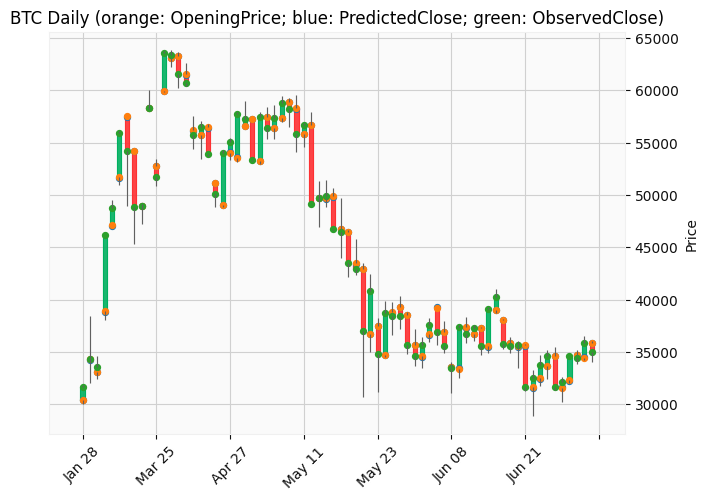

In [37]:
added_values_to_visualize = comparison_table_4_viz_btc_daily[['PredictedClose', 'Open', 'Close']]
apd  = mpf.make_addplot(added_values_to_visualize, type = 'scatter')
ticker = 'BTC Daily (orange: OpeningPrice; blue: PredictedClose; green: ObservedClose)'
fig, axes = mpf.plot(comparison_table_4_viz_btc_daily, type = 'candle', addplot = apd, returnfig = True, style = 'yahoo')
axes[0].set_title(ticker)
today = date.today().strftime('%Y-%m-%d')
fig.savefig(SA_results_path + 'btc_evaluation_viz_withfakepriceprediction_' + today + '.png')

# Legend: (not yet implemented in MPLFinance)
## green: Close
## blue: PredictedClose
## orange: Open

### Dogecoin (DOGE)

In [38]:
comparison_table_4_viz_doge_daily = comparison_table_doge_daily
comparison_table_4_viz_doge_daily["PredictedClose"] = np.where(comparison_table_4_viz_doge_daily["PredictedTrendbySA"] == 'bullish', comparison_table_4_viz_doge_daily["Open"] + 50, np.where(comparison_table_4_viz_doge_daily["PredictedTrendbySA"] == 'bearish', comparison_table_4_viz_doge_daily["Open"] - 50, comparison_table_4_viz_doge_daily["Open"]))
display(comparison_table_4_viz_doge_daily)

,DOGE_final_sentiment_daily,Open,High,Low,Close,Volume,EmpiricalPriceTrend,PredictedTrendbySA,ObservedTrend,PredictionIsCorrect,PredictedClose
Date,,,,,,,,,,,
2021-01-28,-4,0.007481,0.013826,0.007351,0.012555,2125005503,0.005074,bearish,bullish,False,-49.992519
2021-01-29,-8,0.043734,0.077973,0.032341,0.047162,25403310432,0.003428,bearish,bullish,False,-49.956266
2021-02-01,2,0.037054,0.043250,0.033367,0.034875,6319224026,-0.002179,bullish,bearish,False,50.037054
2021-02-08,1,0.078352,0.084945,0.064702,0.078825,12844375210,0.000473,bullish,bullish,True,50.078352
2021-02-14,-1,0.066448,0.066448,0.056723,0.062537,3984667628,-0.003911,bearish,bearish,True,-49.933552
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-26,2,0.237673,0.255127,0.230972,0.244784,2649457302,0.007111,bullish,bullish,True,50.237673
2021-06-27,-5,0.246045,0.266891,0.240894,0.264450,2167521670,0.018405,bearish,bullish,False,-49.753955
2021-06-28,9,0.264918,0.266982,0.250762,0.256857,1932994784,-0.008061,bullish,bearish,False,50.264918


Text(0.5, 1.0, 'DOGE Daily (orange: OpeningPrice; blue: PredictedClose; green: ObservedClose)')

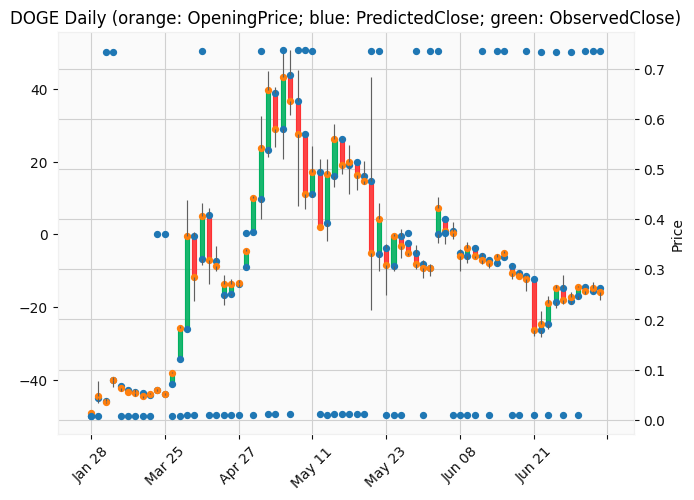

In [39]:
added_values_to_visualize = comparison_table_4_viz_doge_daily[['PredictedClose', 'Open', 'Close']]
apd  = mpf.make_addplot(added_values_to_visualize, type = 'scatter')
ticker = 'DOGE Daily (orange: OpeningPrice; blue: PredictedClose; green: ObservedClose)'
fig, axes = mpf.plot(comparison_table_4_viz_doge_daily, type = 'candle', addplot = apd, returnfig = True, style = 'yahoo')
axes[0].set_title(ticker)
today = date.today().strftime('%Y-%m-%d')
fig.savefig(SA_results_path + 'doge_evaluation_viz_withfakepriceprediction_' + today + '.png')

# Legend: (not yet implemented in MPLFinance)
## green: Close
## blue: PredictedClose
## orange: Open

### Ethereum (ETH)

In [40]:
comparison_table_4_viz_eth_daily = comparison_table_eth_daily
comparison_table_4_viz_eth_daily["PredictedClose"] = np.where(comparison_table_4_viz_eth_daily["PredictedTrendbySA"] == 'bullish', comparison_table_4_viz_eth_daily["Open"] + 50, np.where(comparison_table_4_viz_eth_daily["PredictedTrendbySA"] == 'bearish', comparison_table_4_viz_eth_daily["Open"] - 50, comparison_table_4_viz_eth_daily["Open"]))
display(comparison_table_4_viz_eth_daily)

,ETH_final_sentiment_daily,Open,High,Low,Close,Volume,EmpiricalPriceTrend,PredictedTrendbySA,ObservedTrend,PredictionIsCorrect,PredictedClose
Date,,,,,,,,,,,
2021-01-28,-44,1251.279785,1321.613037,1226.173950,1298.101807,39790481941,46.822021,bearish,bullish,False,1201.279785
2021-01-29,-8,1369.086792,1428.981201,1292.240112,1382.522827,53611955259,13.436035,bearish,bullish,False,1319.086792
2021-02-01,-30,1314.855225,1373.845825,1274.357788,1369.040527,29210670920,54.185303,bearish,bullish,False,1264.855225
2021-02-08,-33,1613.642212,1770.590820,1571.579956,1746.616821,48012285956,132.974609,bearish,bullish,False,1563.642212
2021-02-14,-16,1814.372314,1848.154053,1789.914185,1805.084106,31439114900,-9.288208,bearish,bearish,True,1764.372314
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-26,0,1810.884277,1850.179810,1719.559448,1829.239258,20637542361,18.354980,neutral,bullish,False,1810.884277
2021-06-27,-10,1830.996948,1979.958130,1811.245850,1978.894653,19885474742,147.897705,bearish,bullish,False,1780.996948
2021-06-28,-1,1981.386475,2139.805420,1963.615479,2079.657471,25514602841,98.270996,bearish,bullish,False,1931.386475


Text(0.5, 1.0, 'ETH Daily (orange: OpeningPrice; blue: PredictedClose; green: ObservedClose)')

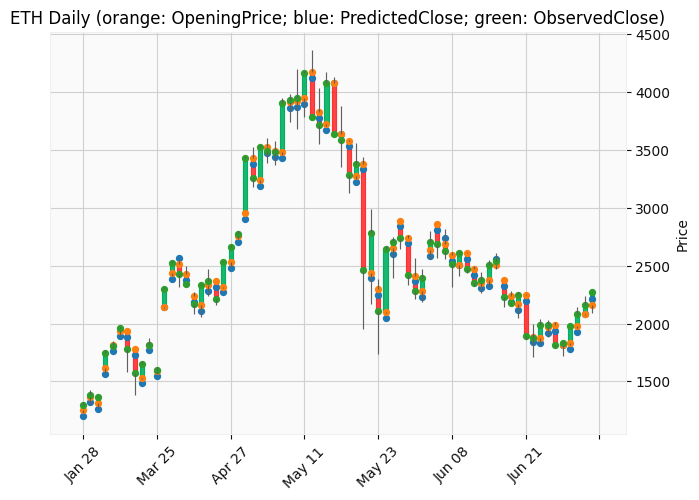

In [41]:
added_values_to_visualize = comparison_table_4_viz_eth_daily[['PredictedClose', 'Open', 'Close']]
apd  = mpf.make_addplot(added_values_to_visualize, type = 'scatter')
ticker = 'ETH Daily (orange: OpeningPrice; blue: PredictedClose; green: ObservedClose)'
fig, axes = mpf.plot(comparison_table_4_viz_eth_daily, type = 'candle', addplot = apd, returnfig = True, style = 'yahoo')
axes[0].set_title(ticker)
today = date.today().strftime('%Y-%m-%d')
fig.savefig(SA_results_path + 'eth_evaluation_viz_withfakepriceprediction_' + today + '.png')

# Legend: (not yet implemented in MPLFinance)
## green: Close
## blue: PredictedClose
## orange: Open

## Approach 2: Actual Sentiment Strength

### Bitcoin (BTC)

Text(0.5, 1.0, 'BTC Daily (orange: Extent of Sentiment --> positive: bullish; negative: bearish)')

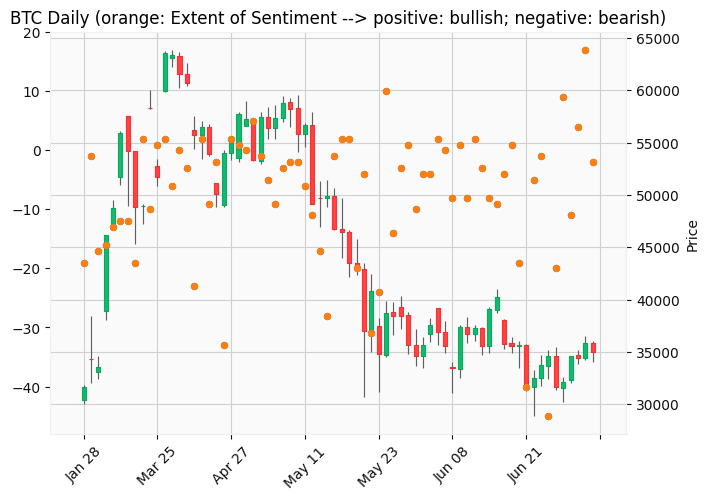

In [42]:
btc_added_values_to_visualize_daily = comparison_table_4_viz_btc_daily[['BTC_final_sentiment_daily']]
apds = [mpf.make_addplot(btc_added_values_to_visualize_daily, type = 'scatter'),
        mpf.make_addplot(comparison_table_4_viz_btc_daily['BTC_final_sentiment_daily'], type = 'scatter', secondary_y = 'auto')]
ticker = 'BTC Daily (orange: Extent of Sentiment --> positive: bullish; negative: bearish)'
fig, axes = mpf.plot(comparison_table_4_viz_btc_daily, type = 'candle', style = 'yahoo', addplot = apds, returnfig = True)
axes[0].set_title(ticker)
today = date.today().strftime('%Y-%m-%d')
fig.savefig(SA_results_path + 'btc_evaluation_viz_daily_' + today + '.png')

In [43]:
comparison_table_4_viz_btc_weekly = comparison_table_bitcoin_weekly
comparison_table_4_viz_btc_weekly["PredictedClose"] = np.where(comparison_table_4_viz_btc_weekly["PredictedTrendbySA"] == 'bullish', comparison_table_4_viz_btc_weekly["Open"] + 50, np.where(comparison_table_4_viz_btc_weekly["PredictedTrendbySA"] == 'bearish', comparison_table_4_viz_btc_weekly["Open"] - 50, comparison_table_4_viz_btc_weekly["Open"]))
comparison_table_4_viz_btc_weekly["WeekNumber"] = comparison_table_4_viz_btc_weekly.index
comparison_table_4_viz_btc_weekly.set_index('Date', inplace = True)
display(comparison_table_4_viz_btc_weekly)

,BTC_final_sentiment_weekly,Open,High,Low,Close,Volume,EmpiricalPriceTrend,PredictedTrendbySA,ObservedTrend,PredictionIsCorrect,PredictedClose,WeekNumber
Date,,,,,,,,,,,,
2021-01-25,-20,32285.798828,38406.261719,29367.138672,33114.359375,497468344671,828.560547,bearish,bullish,False,32235.798828,4
2021-02-01,-17,33114.578125,40846.546875,32384.228516,38903.441406,449918619842,5788.863281,bearish,bullish,False,33064.578125,5
2021-02-08,-29,38886.828125,49487.640625,38076.324219,48717.289062,580021243858,9830.460938,bearish,bullish,False,38836.828125,6
2021-02-15,-12,48696.535156,58330.570312,46347.476562,57539.945312,470533297170,8843.410156,bearish,bullish,False,48646.535156,7
2021-02-22,-31,57532.738281,57533.390625,43241.617188,45137.769531,766679775805,-12394.968750,bearish,bearish,True,57482.738281,8
2021-03-01,2,45159.503906,52535.136719,45115.093750,51206.691406,333113779409,6047.187500,bullish,bullish,True,45209.503906,9
2021-03-15,-10,59267.429688,60540.992188,53555.027344,57523.421875,393542542227,-1744.007812,bearish,bearish,True,59217.429688,11
2021-03-22,1,57517.890625,58471.480469,50856.570312,55950.746094,403128836645,-1567.144531,bullish,bearish,False,57567.890625,12
2021-04-12,-7,60175.945312,64863.097656,52829.535156,56216.183594,508118943571,-3959.761719,bearish,bearish,True,60125.945312,15


Text(0.5, 1.0, 'BTC Weekly (orange: Extent of Sentiment --> positive: bullish; negative: bearish)')

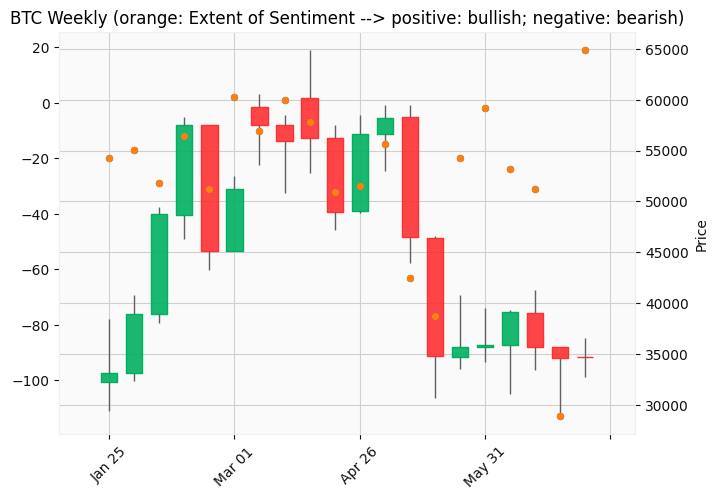

In [44]:
btc_added_values_to_visualize_weekly = comparison_table_4_viz_btc_weekly[['BTC_final_sentiment_weekly']]
apds = [mpf.make_addplot(btc_added_values_to_visualize_weekly, type = 'scatter'),
        mpf.make_addplot(comparison_table_4_viz_btc_weekly['BTC_final_sentiment_weekly'], type = 'scatter', secondary_y = 'auto')]
ticker = 'BTC Weekly (orange: Extent of Sentiment --> positive: bullish; negative: bearish)'
fig, axes = mpf.plot(comparison_table_4_viz_btc_weekly, type = 'candle', style = 'yahoo', addplot = apds, returnfig = True)
axes[0].set_title(ticker)
today = date.today().strftime('%Y-%m-%d')
fig.savefig(SA_results_path + 'btc_evaluation_viz_weekly_' + today + '.png')

### Dogecoin (DOGE)

Text(0.5, 1.0, 'DOGE Daily (orange: Extent of Sentiment --> positive: bullish; negative: bearish)')

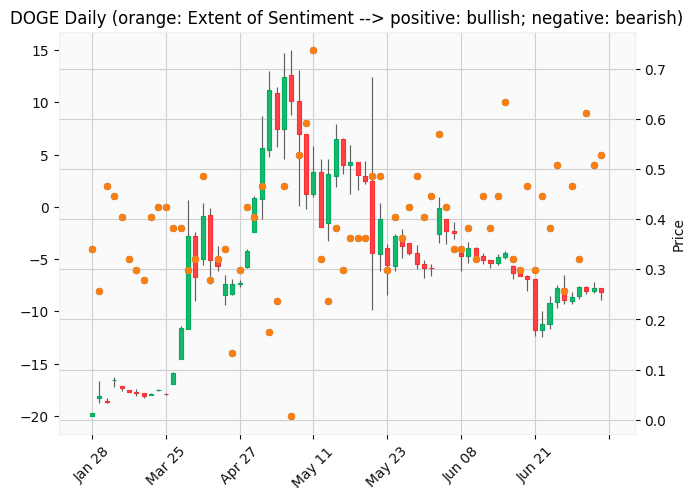

In [45]:
doge_added_values_to_visualize_daily = comparison_table_4_viz_doge_daily[['DOGE_final_sentiment_daily']]
apds = [mpf.make_addplot(doge_added_values_to_visualize_daily, type = 'scatter'),
        mpf.make_addplot(comparison_table_4_viz_doge_daily['DOGE_final_sentiment_daily'], type = 'scatter', secondary_y = 'auto')]
ticker = 'DOGE Daily (orange: Extent of Sentiment --> positive: bullish; negative: bearish)'
fig, axes = mpf.plot(comparison_table_4_viz_doge_daily, type = 'candle', style = 'yahoo', addplot = apds, returnfig = True)
axes[0].set_title(ticker)
today = date.today().strftime('%Y-%m-%d')
fig.savefig(SA_results_path + 'doge_evaluation_viz_daily_' + today + '.png')

In [46]:
comparison_table_4_viz_doge_weekly = comparison_table_dogecoin_weekly
comparison_table_4_viz_doge_weekly["PredictedClose"] = np.where(comparison_table_4_viz_doge_weekly["PredictedTrendbySA"] == 'bullish', comparison_table_4_viz_doge_weekly["Open"] + 50, np.where(comparison_table_4_viz_doge_weekly["PredictedTrendbySA"] == 'bearish', comparison_table_4_viz_doge_weekly["Open"] - 50, comparison_table_4_viz_doge_weekly["Open"]))
comparison_table_4_viz_doge_weekly["WeekNumber"] = comparison_table_4_viz_doge_weekly.index
comparison_table_4_viz_doge_weekly.set_index('Date', inplace = True)
display(comparison_table_4_viz_doge_weekly)

,DOGE_final_sentiment_weekly,Open,High,Low,Close,Volume,EmpiricalPriceTrend,PredictedTrendbySA,ObservedTrend,PredictionIsCorrect,PredictedClose,WeekNumber
Date,,,,,,,,,,,,
2021-01-25,-12,0.008727,0.077973,0.007294,0.037196,45359682180,0.028469,bearish,bullish,False,-49.991273,4
2021-02-01,2,0.037054,0.084357,0.029195,0.078782,51941100416,0.041728,bullish,bullish,True,50.037054,5
2021-02-08,0,0.078352,0.084945,0.056723,0.062537,41590422363,-0.015815,neutral,bearish,False,0.078352,6
2021-02-15,-5,0.062568,0.063924,0.048034,0.055980,24457389035,-0.006588,bearish,bearish,True,-49.937432,7
2021-02-22,-13,0.056044,0.060466,0.042410,0.048052,16655250530,-0.007992,bearish,bearish,True,-49.943956,8
2021-03-01,-1,0.048070,0.052397,0.047879,0.052122,8704255861,0.004052,bearish,bullish,False,-49.951930,9
2021-03-15,0,0.058531,0.060639,0.054143,0.057234,7641462170,-0.001297,neutral,bearish,False,0.058531,11
2021-03-22,0,0.057259,0.057732,0.049697,0.053698,5747049473,-0.003561,neutral,bearish,False,0.057259,12
2021-04-12,-15,0.074544,0.437700,0.068889,0.320475,173047270323,0.245931,bearish,bullish,False,-49.925456,15


Text(0.5, 1.0, 'DOGE Weekly (orange: Extent of Sentiment --> positive: bullish; negative: bearish)')

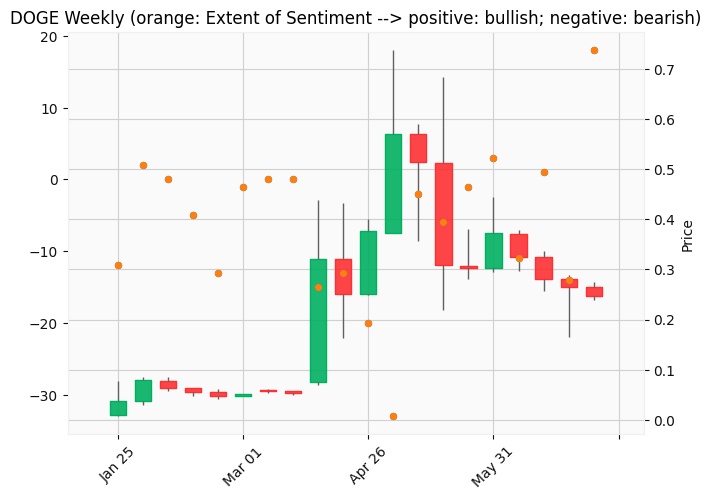

In [47]:
doge_added_values_to_visualize_weekly = comparison_table_4_viz_doge_weekly[['DOGE_final_sentiment_weekly']]
apds = [mpf.make_addplot(doge_added_values_to_visualize_weekly, type = 'scatter'),
        mpf.make_addplot(comparison_table_4_viz_doge_weekly['DOGE_final_sentiment_weekly'], type = 'scatter', secondary_y = 'auto')]
ticker = 'DOGE Weekly (orange: Extent of Sentiment --> positive: bullish; negative: bearish)'
fig, axes = mpf.plot(comparison_table_4_viz_doge_weekly, type = 'candle', style = 'yahoo', addplot = apds, returnfig = True)
axes[0].set_title(ticker)
today = date.today().strftime('%Y-%m-%d')
fig.savefig(SA_results_path + 'doge_evaluation_viz_weekly_' + today + '.png')

### Ethereum (ETH)

Text(0.5, 1.0, 'ETH Daily (orange: Extent of Sentiment --> positive: bullish; negative: bearish)')

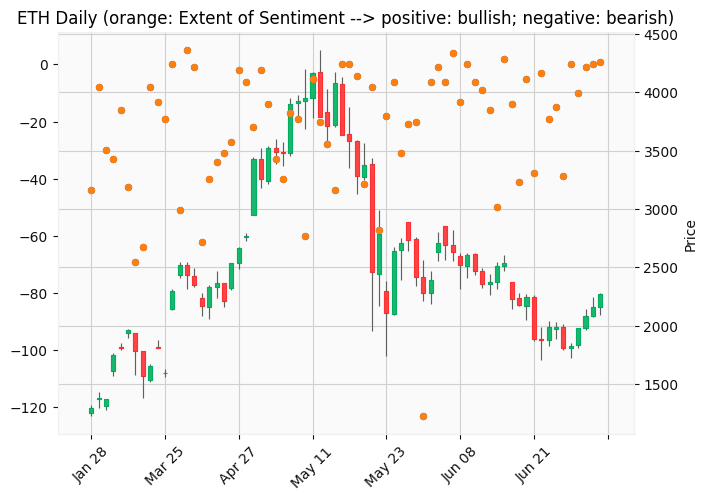

In [48]:
eth_added_values_to_visualize_daily = comparison_table_4_viz_eth_daily[['ETH_final_sentiment_daily']]
apds = [mpf.make_addplot(eth_added_values_to_visualize_daily, type = 'scatter'),
        mpf.make_addplot(comparison_table_4_viz_eth_daily['ETH_final_sentiment_daily'], type = 'scatter', secondary_y = 'auto')]
ticker = 'ETH Daily (orange: Extent of Sentiment --> positive: bullish; negative: bearish)'
fig, axes = mpf.plot(comparison_table_4_viz_eth_daily, type = 'candle', style = 'yahoo', addplot = apds, returnfig = True)
axes[0].set_title(ticker)
today = date.today().strftime('%Y-%m-%d')
fig.savefig(SA_results_path + 'eth_evaluation_viz_daily_' + today + '.png')

In [49]:
comparison_table_4_viz_eth_weekly = comparison_table_ethereum_weekly
comparison_table_4_viz_eth_weekly["PredictedClose"] = np.where(comparison_table_4_viz_eth_weekly["PredictedTrendbySA"] == 'bullish', comparison_table_4_viz_eth_weekly["Open"] + 50, np.where(comparison_table_4_viz_eth_weekly["PredictedTrendbySA"] == 'bearish', comparison_table_4_viz_eth_weekly["Open"] - 50, comparison_table_4_viz_eth_weekly["Open"]))
comparison_table_4_viz_eth_weekly["WeekNumber"] = comparison_table_4_viz_eth_weekly.index
comparison_table_4_viz_eth_weekly.set_index('Date', inplace = True)
display(comparison_table_4_viz_eth_weekly)

,ETH_final_sentiment_weekly,Open,High,Low,Close,Volume,EmpiricalPriceTrend,PredictedTrendbySA,ObservedTrend,PredictionIsCorrect,PredictedClose,WeekNumber
Date,,,,,,,,,,,,
2021-01-25,-52,1390.639893,1467.784912,1215.311279,1314.986206,273750977500,-75.653687,bearish,bearish,True,1340.639893,4
2021-02-01,-30,1314.855225,1756.510986,1274.357788,1614.227783,280790741209,299.372559,bearish,bullish,False,1264.855225,5
2021-02-08,-49,1613.642212,1871.603516,1571.579956,1805.084106,274834235664,191.441895,bearish,bullish,False,1563.642212,6
2021-02-15,-43,1804.676758,2036.286499,1683.906616,1935.601074,222027748895,130.924316,bearish,bullish,False,1754.676758,7
2021-02-22,-133,1935.557861,1936.453735,1300.472168,1416.048950,230065320353,-519.508911,bearish,bearish,True,1885.557861,8
2021-03-01,-8,1417.151123,1730.924194,1416.416138,1723.153809,159760752478,306.002686,bearish,bullish,False,1367.151123,9
2021-03-15,-13,1854.086670,1889.196655,1705.716064,1788.217041,164754388552,-65.869629,bearish,bearish,True,1804.086670,11
2021-03-22,-19,1788.362183,1811.968262,1560.370483,1691.355957,163726181464,-97.006226,bearish,bearish,True,1738.362183,12
2021-04-12,-47,2157.361816,2547.555664,2011.766846,2237.136963,238346115303,79.775146,bearish,bullish,False,2107.361816,15


Text(0.5, 1.0, 'ETH Weekly (orange: Extent of Sentiment --> positive: bullish; negative: bearish)')

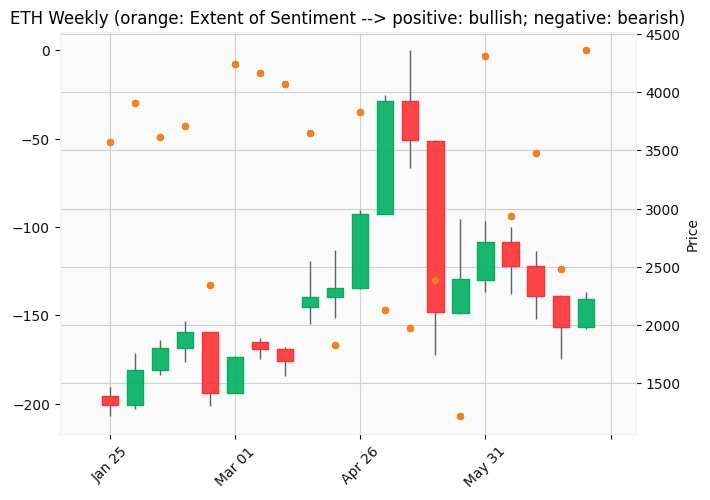

In [50]:
eth_added_values_to_visualize_weekly = comparison_table_4_viz_eth_weekly[['ETH_final_sentiment_weekly']]
apds = [mpf.make_addplot(eth_added_values_to_visualize_weekly, type = 'scatter'),
        mpf.make_addplot(comparison_table_4_viz_eth_weekly['ETH_final_sentiment_weekly'], type = 'scatter', secondary_y = 'auto')]
ticker = 'ETH Weekly (orange: Extent of Sentiment --> positive: bullish; negative: bearish)'
fig, axes = mpf.plot(comparison_table_4_viz_eth_weekly, type = 'candle', style = 'yahoo', addplot = apds, returnfig = True)
axes[0].set_title(ticker)
today = date.today().strftime('%Y-%m-%d')
fig.savefig(SA_results_path + 'eth_evaluation_viz_weekly_' + today + '.png')

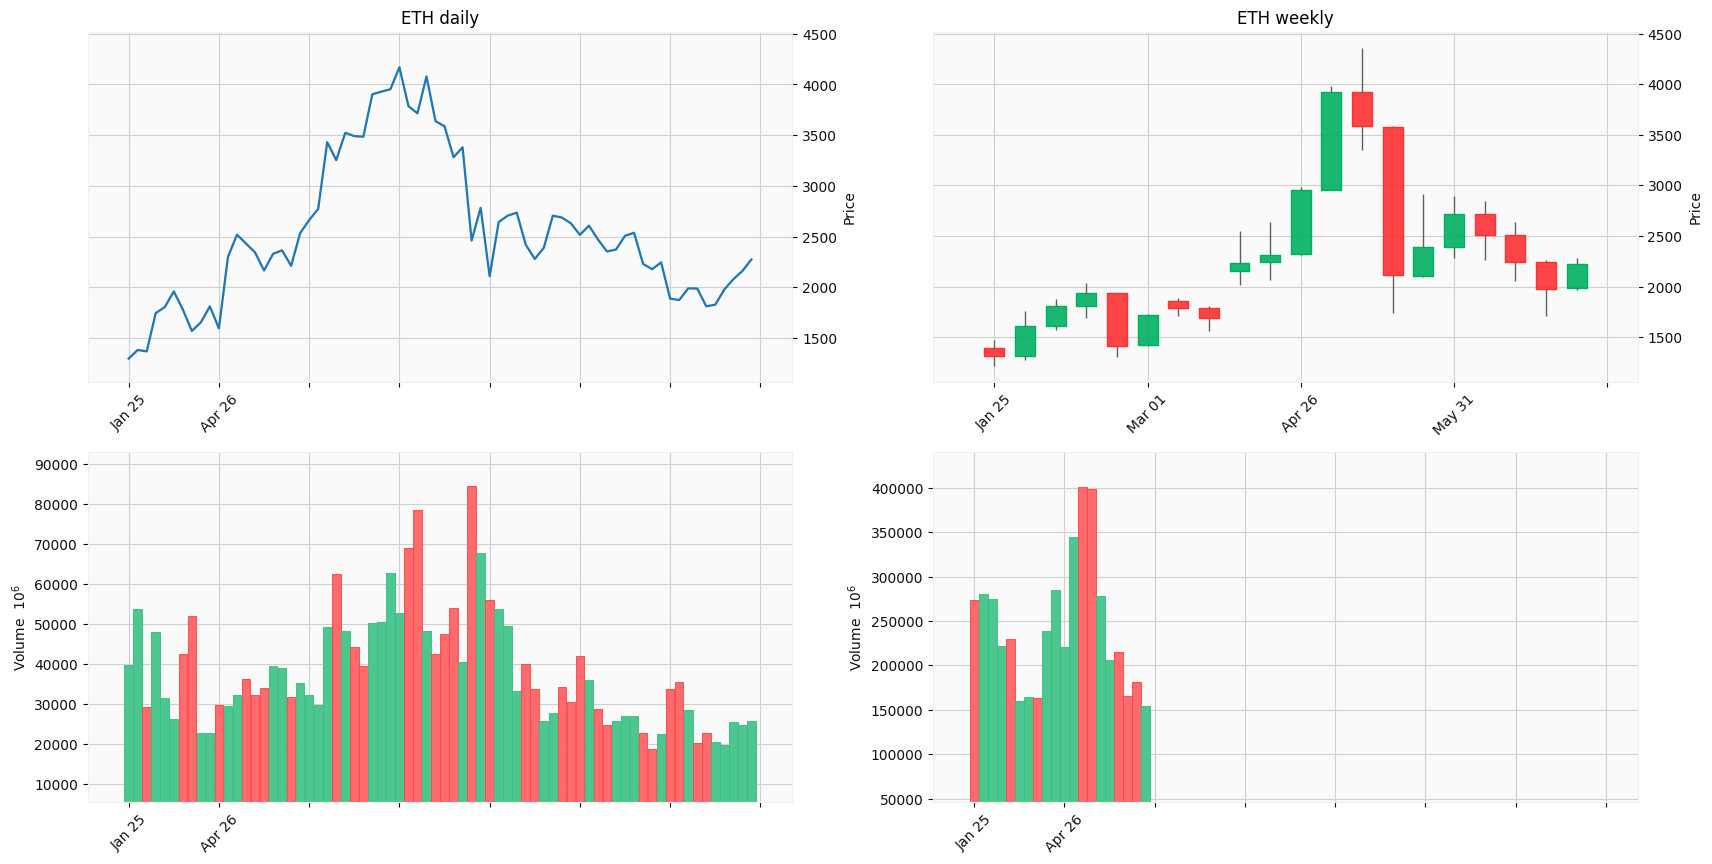

In [51]:
# Day Chart vs. Week Chart
fig = mpf.figure(figsize = (20,10), style = 'yahoo')
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

av1 = fig.add_subplot(2,2,3, sharex = ax1)
av2 = fig.add_subplot(2,2,4, sharex = ax1)

mpf.plot(comparison_table_4_viz_eth_daily, type = 'line', style = 'yahoo', axtitle ="ETH daily", volume = av1, ax = ax1)
mpf.plot(comparison_table_4_viz_eth_weekly, type = 'candle', style = 'yahoo', axtitle ="ETH weekly", volume = av2, ax = ax2)

# eth_added_values_to_visualize_weekly = comparison_table_4_viz_eth_weekly[['ETH_final_sentiment_weekly']]
# apds_eth_weekly = [mpf.make_addplot(eth_added_values_to_visualize_weekly, type = 'scatter'), mpf.make_addplot(comparison_table_4_viz_eth_weekly['ETH_final_sentiment_weekly'], type = 'scatter', secondary_y = 'auto')]
# eth_added_values_to_visualize_daily = comparison_table_4_viz_eth_daily[['ETH_final_sentiment_daily']]
# apds_eth_daily = [mpf.make_addplot(eth_added_values_to_visualize_daily, type = 'scatter'), mpf.make_addplot(comparison_table_4_viz_eth_daily['ETH_final_sentiment_daily'], type = 'scatter', secondary_y = 'auto')]
# mpf.plot(comparison_table_4_viz_eth_daily, type = 'line', style = 'yahoo', axtitle ="ETH daily", volume = av1, addplot = apds_eth_daily, ax = ax1)
# mpf.plot(comparison_table_4_viz_eth_weekly, type = 'candle', style = 'yahoo', axtitle ="ETH weekly", volume = av1, addplot = apds_eth_weekly, ax = ax2)